# 01 - Data Cleaning & Preprocessing
> Mục tiêu: Làm sạch dữ liệu, xử lý giá trị thiếu, mã hóa, loại bỏ nhiễu và giá trị ngoại lệ. Kết quả đầu ra: File `processed.csv` hoàn chỉnh, sẵn sàng để huấn luyện mô hình.

## 1.1: Import các thư viện cần thiết

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

## 1.2: Đọc dữ liệu

In [101]:
# Đọc file CSV từ thư mục data/
df = pd.read_csv("../data/raw/train.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Loại bỏ khoảng trắng thừa trong tên cột
df.head()

,id,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### chuyển cột age sang dạng int 32

In [102]:
df['age'] = df['age'].astype('int32')


## 1.3: Lọc ra giá trị học sinh có tuổi từ 18-24 và chưa đi làm

In [103]:
df = df[df['working_professional_or_student'] == 'Student'].copy()
df = df[(df['age'] >= 18) & (df['age'] <= 24)]
print(f"Số dòng còn lại sau lọc: {len(df)}")

Số dòng còn lại sau lọc: 12173


## 1.4: Kiểm tra thông tin dữ liệu

In [104]:

# Tổng quan về dữ liệu
df.info()

# Kiểm tra giá trị thiếu
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 12173 entries, 8 to 140690
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     12173 non-null  int64  
 1   name                                   12173 non-null  object 
 2   gender                                 12173 non-null  object 
 3   age                                    12173 non-null  int32  
 4   city                                   12173 non-null  object 
 5   working_professional_or_student        12173 non-null  object 
 6   profession                             12 non-null     object 
 7   academic_pressure                      12167 non-null  float64
 8   work_pressure                          2 non-null      float64
 9   cgpa                                   12168 non-null  float64
 10  study_satisfaction                     12166 non-null  float64
 11  job_sa

id                                           0
name                                         0
gender                                       0
age                                          0
city                                         0
working_professional_or_student              0
profession                               12161
academic_pressure                            6
work_pressure                            12171
cgpa                                         5
study_satisfaction                           7
job_satisfaction                         12168
sleep_duration                               0
dietary_habits                               1
degree                                       0
have_you_ever_had_suicidal_thoughts_?        0
work/study_hours                             0
financial_stress                             1
family_history_of_mental_illness             0
depression                                   0
dtype: int64

In [105]:
(df['depression'].isin([0])).sum()

3848

## 1.5:Loại bỏ các thuộc tính dư thừa

### 1.5.1: Loại bỏ cột không có giá trị học máy

In [106]:
cols_to_drop = ['id','name','working_professional_or_student','work_pressure', 'job_satisfaction','profession']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df.head(10)

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
8,Female,24,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
83,Male,24,Nagpur,3.0,6.10,3.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1
100,Female,19,Rajkot,2.0,8.52,4.0,Less than 5 hours,Unhealthy,Class 12,No,6.0,2.0,Yes,0
103,Female,19,Kalyan,5.0,5.64,5.0,Less than 5 hours,Moderate,Class 12,Yes,4.0,5.0,Yes,1
132,Female,20,Ahmedabad,5.0,7.25,3.0,5-6 hours,Healthy,Class 12,Yes,10.0,3.0,No,1
139,Male,19,Chennai,2.0,7.83,2.0,7-8 hours,Unhealthy,Class 12,No,6.0,3.0,No,0
172,Male,23,Thane,1.0,8.59,4.0,7-8 hours,Healthy,BHM,No,11.0,3.0,No,0
173,Male,18,Bangalore,4.0,7.10,3.0,More than 8 hours,Unhealthy,Class 12,Yes,11.0,5.0,Yes,1
176,Female,20,Mumbai,5.0,8.58,5.0,7-8 hours,Moderate,Class 12,No,2.0,2.0,Yes,1
222,Male,18,Surat,4.0,6.70,5.0,Less than 5 hours,Moderate,Class 12,Yes,5.0,4.0,Yes,1


### 1.5.2: Loại bỏ các thông tin sai lệch

In [107]:
# 1. Loại bỏ các tên thành phố sai lệch
invalid_cities = ['3.0', 'Mira', 'Vaanya', 'Harsh', 'Reyansh',
                'Bhavna', 'Kibara', 'Rashi', 'Nalini']

df = df[~df['city'].isin(invalid_cities)]
# 2. Làm sạch cột 'sleep_duration'
invalid_sleep = ['10-11 hours','2-3 hours','55-66 hours','3-4 hours']
df = df[~df['sleep_duration'].isin(invalid_sleep)]
#3 . Làm sạch cột 'dietary_habits'
invalid_diet = ['3', 'Mihir', 'Yes']
df = df[~df['dietary_habits'].isin(invalid_diet)]

# 4. Làm sạch cột 'degree'
invalid_degrees = ['Bhopal', '20', 'M', 'P.Com', '7.06', '24', '8.56', 'Mthanya', '0']
df = df[~df['degree'].isin(invalid_degrees)]

## 1.6: Ánh xạ Việt hóa

### 1.6.1 Ánh xạ thành phố và gán giá trị theo cấp độ đô thị

In [108]:
# Cấp độ đô thị Ấn Độ
city_level_map = {
    # S - Siêu đô thị
    'Mumbai': 'S',
    'Delhi': 'S',

    # I - Đô thị trung tâm
    'Bangalore': 'I', 'Kolkata': 'I', 'Chennai': 'I', 'Hyderabad': 'I',

    # II - Công nghiệp / Kinh tế lớn
    'Pune': 'II', 'Ahmedabad': 'II', 'Surat': 'II', 'Kanpur': 'II',

    # III - Thủ phủ & Vùng
    'Lucknow': 'III', 'Jaipur': 'III', 'Nagpur': 'III', 'Indore': 'III',
    'Patna': 'III', 'Bhopal': 'III', 'Visakhapatnam': 'III',

    # IV - Vệ tinh & CN nhỏ
    'Thane': 'IV', 'Ghaziabad': 'IV', 'Faridabad': 'IV', 'Vadodara': 'IV',
    'Meerut': 'IV', 'Nashik': 'IV', 'Kalyan': 'IV', 'Vasai-Virar': 'IV',
    'Rajkot': 'IV', 'Ludhiana': 'IV',

    # V - Đặc thù
    'Srinagar': 'V', 'Varanasi': 'V', 'Agra': 'V'
}
vn_city_groups = {
    'Đặc Biệt': ['Hà Nội', 'TP. Hồ Chí Minh'],
    'I': ['Hải Phòng', 'Đà Nẵng', 'Cần Thơ'],
    'II': ['Bình Dương', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'Bắc Ninh', 'Quảng Ninh', 'Vĩnh Phúc', 'Thái Nguyên', 'Hải Dương'],
    'III': ['Thanh Hóa', 'Nghệ An', 'Khánh Hòa', 'Thừa Thiên Huế', 'Long An', 'Tiền Giang', 'Bắc Giang', 'Quảng Nam', 'Bình Định', 'Đắk Lắk'],
    'IV': ['Thái Bình', 'Hưng Yên', 'Nam Định', 'Hà Nam', 'Ninh Bình',
           'Bình Thuận', 'Phú Yên', 'Quảng Ngãi', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Ninh Thuận',
           'An Giang', 'Kiên Giang', 'Bến Tre', 'Vĩnh Long', 'Trà Vinh', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau', 'Hậu Giang'],
    'V': ['Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Lạng Sơn', 'Tuyên Quang', 'Yên Bái', 'Lào Cai', 'Lai Châu',
          'Điện Biên', 'Sơn La', 'Hòa Bình', 'Kon Tum', 'Gia Lai', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước', 'Tây Ninh'],
    'Di sản': ['Huế', 'Quảng Nam', 'Lâm Đồng', 'Ninh Bình']
}


### 1.6.2: Viết hàm ánh xạ xác suất theo quy tắc của từng cấp độ

In [109]:
import random

def map_indian_city_to_vietnamese(city):
    level = city_level_map.get(city)
    if not level:
        return "Khác"

    if level == 'S':
        choices = vn_city_groups['Đặc Biệt'] * 7 + vn_city_groups['I'] * 2 + vn_city_groups['II']
    elif level == 'I':
        choices = vn_city_groups['Đặc Biệt'] * 4 + (vn_city_groups['I'] + vn_city_groups['II']) * 4 + vn_city_groups['III'] * 2
    elif level == 'II':
        choices = vn_city_groups['II'] * 5 + (vn_city_groups['I'] + vn_city_groups['Đặc Biệt']) * 3 + vn_city_groups['III'] * 2
    elif level == 'III':
        choices = vn_city_groups['III'] * 4 + vn_city_groups['IV'] * 3 + vn_city_groups['II'] * 2 + (vn_city_groups['I'] + vn_city_groups['Đặc Biệt'])
    elif level == 'IV':
        choices = vn_city_groups['IV'] * 5 + vn_city_groups['III'] * 3 + vn_city_groups['V'] + vn_city_groups['II']
    elif level == 'V':
        choices = vn_city_groups['Di sản'] * 6 + (vn_city_groups['IV'] + vn_city_groups['III']) * 3 + ['Khác']
    else:
        return "Khác"

    return random.choice(choices)


### 1.6.3: Ánh xạ sang bằng cấp Việt Nam

In [110]:
degree_mapping = {
    # Phổ thông
    'Class 12': 'Tốt nghiệp THPT',
    # Cử nhân
    'BA': 'Cử nhân Xã hội & Nhân văn',
    'BSc': 'Cử nhân Khoa học Tự nhiên',
    'B.Com': 'Cử nhân Thương mại / Kinh tế',
    'BBA': 'Cử nhân Quản trị Kinh doanh',
    'BCA': 'Cử nhân CNTT',
    'BHM': 'Cử nhân Quản lý Khách sạn',
    'B.Ed': 'Cử nhân Sư phạm',
    'LLB': 'Cử nhân Luật',
    'BE': 'Kỹ sư',
    'B.Tech': 'Kỹ sư Công nghệ',
    'B.Arch': 'Kiến trúc sư',
    'B.Pharm': 'Dược sĩ Đại học',
    'MBBS': 'Bác sĩ Đa khoa',
    # Thạc sĩ
    'MA': 'Thạc sĩ Xã hội & Nhân văn',
    'MSc': 'Thạc sĩ Khoa học Tự nhiên',
    'M.Com': 'Thạc sĩ Thương mại',
    'MBA': 'Thạc sĩ Quản trị Kinh doanh',
    'MCA': 'Thạc sĩ CNTT',
    'MHM': 'Thạc sĩ Quản lý Khách sạn',
    'M.Ed': 'Thạc sĩ Giáo dục',
    'LLM': 'Thạc sĩ Luật',
    'ME': 'Thạc sĩ Kỹ thuật',
    'M.Tech': 'Thạc sĩ Kỹ thuật Công nghệ',
    'M.Pharm': 'Thạc sĩ Dược học',
    'MD': 'Bác sĩ Chuyên khoa',
    # Tiến sĩ
    'PhD': 'Tiến sĩ',
    # Khác
    'Others': 'Khác'
}


### 1.6.4: Ánh xạ Sleep Duration

In [111]:
sleep_duration_mapping = {
    'Less than 5 hours': 'Dưới 5 tiếng',
    '5-6 hours': '5-6 tiếng',
    '7-8 hours': '7-8 tiếng',
    'More than 8 hours': 'Hơn 8 tiếng'
    # 'Others': 'Khác'
}

### 1.6.5: Ánh xạ Dietary Habits

In [112]:
dietary_habits_mapping = {
    'Others': 'Khác',
    'Unhealthy': 'Không lành mạnh',
    'Moderate': 'Trung bình',
    'Healthy': 'Lành mạnh'
}

### 1.6.6: Cập nhật dataframe

In [113]:
df['city'] = df['city'].apply(map_indian_city_to_vietnamese)
df['degree'] = df['degree'].map(degree_mapping)
df['sleep_duration'] = df['sleep_duration'].map(sleep_duration_mapping)
df['dietary_habits'] = df['dietary_habits'].map(dietary_habits_mapping)

In [114]:
df.head()

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
8,Female,24,Thái Nguyên,2.0,5.90,5.0,5-6 tiếng,Trung bình,Cử nhân Khoa học Tự nhiên,No,3.0,2.0,Yes,0
83,Male,24,Hà Tĩnh,3.0,6.10,3.0,5-6 tiếng,Trung bình,Tốt nghiệp THPT,Yes,11.0,1.0,Yes,1
100,Female,19,Thái Bình,2.0,8.52,4.0,Dưới 5 tiếng,Không lành mạnh,Tốt nghiệp THPT,No,6.0,2.0,Yes,0
103,Female,19,Quảng Trị,5.0,5.64,5.0,Dưới 5 tiếng,Trung bình,Tốt nghiệp THPT,Yes,4.0,5.0,Yes,1
132,Female,20,Bình Dương,5.0,7.25,3.0,5-6 tiếng,Lành mạnh,Tốt nghiệp THPT,Yes,10.0,3.0,No,1


## 1.7: Xử lý ngoại lệ với IQR (Interquartile Range)

In [115]:
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data
numeric_cols = ['age','cgpa', 'academic_pressure', 'study_satisfaction',
                'work/study_hours', 'financial_stress']

df = remove_outliers_iqr(df, numeric_cols)

## 1.8: Xử lý giá trị thiếu nhỏ hơn 5%

In [116]:
for col in df.columns:
    missing_ratio = df[col].isnull().sum() / len(df)
    if 0 < missing_ratio < 0.05:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12140 entries, 8 to 140690
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 12140 non-null  object 
 1   age                                    12140 non-null  int32  
 2   city                                   12140 non-null  object 
 3   academic_pressure                      12140 non-null  float64
 4   cgpa                                   12140 non-null  float64
 5   study_satisfaction                     12140 non-null  float64
 6   sleep_duration                         12140 non-null  object 
 7   dietary_habits                         12140 non-null  object 
 8   degree                                 12140 non-null  object 
 9   have_you_ever_had_suicidal_thoughts_?  12140 non-null  object 
 10  work/study_hours                       12140 non-null  float64
 11  financ

In [118]:
df.head()

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
8,Female,24,Thái Nguyên,2.0,5.90,5.0,5-6 tiếng,Trung bình,Cử nhân Khoa học Tự nhiên,No,3.0,2.0,Yes,0
83,Male,24,Hà Tĩnh,3.0,6.10,3.0,5-6 tiếng,Trung bình,Tốt nghiệp THPT,Yes,11.0,1.0,Yes,1
100,Female,19,Thái Bình,2.0,8.52,4.0,Dưới 5 tiếng,Không lành mạnh,Tốt nghiệp THPT,No,6.0,2.0,Yes,0
103,Female,19,Quảng Trị,5.0,5.64,5.0,Dưới 5 tiếng,Trung bình,Tốt nghiệp THPT,Yes,4.0,5.0,Yes,1
132,Female,20,Bình Dương,5.0,7.25,3.0,5-6 tiếng,Lành mạnh,Tốt nghiệp THPT,Yes,10.0,3.0,No,1


In [119]:
df['dietary_habits'].unique()


array(['Trung bình', 'Không lành mạnh', 'Lành mạnh'], dtype=object)

## 1.9: Mã hóa dữ liệu phân loại

In [120]:
# Làm sạch trước khi map (cho tất cả cột nhị phân)
for col in ['gender', 'have_you_ever_had_suicidal_thoughts_?', 'family_history_of_mental_illness']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
# Mã hóa các cột nhị phân
binary_map = {
    'gender': {'male': 1, 'female': 0},
    'have_you_ever_had_suicidal_thoughts_?': {'yes': 1, 'no': 0},
    'family_history_of_mental_illness': {'yes': 1, 'no': 0}
}

for col, mapping in binary_map.items():
    df[col] = df[col].map(mapping)

# Label Encoding các cột còn lại
multi_cat_cols = ['city', 'degree', 'sleep_duration', 'dietary_habits']

label_encoders = {}
for col in multi_cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
joblib.dump(label_encoders, '../models/label_encoders.pkl')

['../models/label_encoders.pkl']

In [121]:
df.head()

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
8,0,24,49,2.0,5.90,5.0,0,2,3,0,3.0,2.0,1,0
83,1,24,19,3.0,6.10,3.0,0,2,26,1,11.0,1.0,1,1
100,0,19,48,2.0,8.52,4.0,2,0,26,0,6.0,2.0,1,0
103,0,19,43,5.0,5.64,5.0,2,2,26,1,4.0,5.0,1,1
132,0,20,2,5.0,7.25,3.0,0,1,26,1,10.0,3.0,0,1


## 1.10: Kiểm tra lần cuối & lưu dữ liệu đã xử lý

In [122]:
print("Dữ liệu sau xử lý:")
print(df.info())
# Lưu lại dữ liệu sạch để dùng cho bước tiếp theo
df.to_csv("../data/processed/processed.csv", index=False)
print("Đã lưu file: data/processed/processed.csv")


Dữ liệu sau xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 12140 entries, 8 to 140690
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 12140 non-null  int64  
 1   age                                    12140 non-null  int32  
 2   city                                   12140 non-null  int32  
 3   academic_pressure                      12140 non-null  float64
 4   cgpa                                   12140 non-null  float64
 5   study_satisfaction                     12140 non-null  float64
 6   sleep_duration                         12140 non-null  int32  
 7   dietary_habits                         12140 non-null  int32  
 8   degree                                 12140 non-null  int32  
 9   have_you_ever_had_suicidal_thoughts_?  12140 non-null  int64  
 10  work/study_hours                       12140 non-null  

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


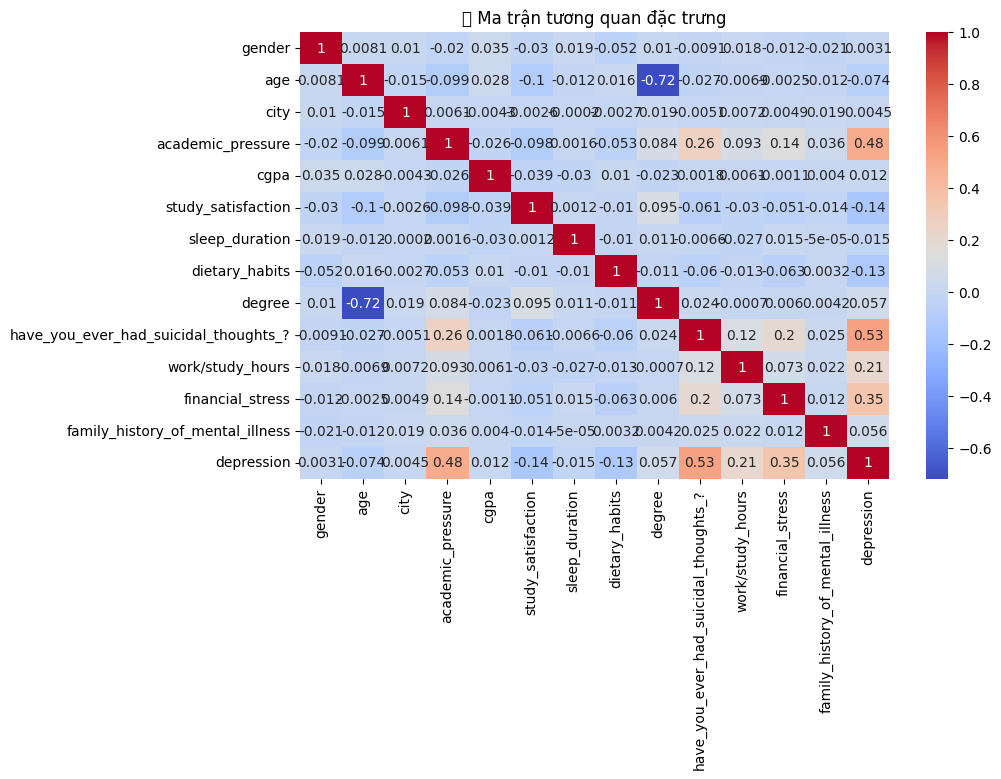

In [123]:
#Kiểm tra tương quan sơ bộ
plt.figure(figsize=(9.5, 5.8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔍 Ma trận tương quan đặc trưng")
plt.show()

In [124]:
# Tách X và y
from sklearn.model_selection import train_test_split
X = df.drop('depression', axis=1)
y = df['depression']

# Tách 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print(" Đã lưu X_train, X_test, y_train, y_test vào thư mục /data/")

 Đã lưu X_train, X_test, y_train, y_test vào thư mục /data/
